# Solving $Ax = 0$: Pivot Variables, Special Solutions

# 1) Derivation

To solve $Ax = 0$, we perform Gaussian elimination to find pivot variables (leading variables) and free variables (non-pivot variables).

A pivot column corresponds to a variable determined by elimination.
A free variable corresponds to a column without a pivot; these generate the null space.

If $A$ is an $m \times n$ matrix:

Rank$(A)$ = number of pivot variables.
Nullity$(A)$ = number of free variables = $n - \text{rank}(A)$.

The general solution is:
$$ x = x_p + x_h $$
where $x_p$ = particular solution (for non-homogeneous systems), and $x_h$ = combination of special solutions (basis of null space).

For $Ax=0$, we only need $x_h$.

# 2) Definitions
* Pivot Variables: Variables corresponding to pivot columns.
* Free Variables: Variables without pivots; they can take arbitrary values.
* Special Solutions: Setting one free variable = 1 (others = 0), solving for pivot variables. These form a basis of the null space.

# 3) Computation (Step-by-Step)

In [1]:
import numpy as np
from sympy import Matrix

# Example matrix
A = Matrix([[2, 4, 2],
            [1, 2, 1],
            [0, 0, 0]])

print("Original Matrix A:")
display(A)

# Step 1: Row reduce to RREF
rref_matrix, pivots = A.rref()
print("\nStep 1: Row Reduced Echelon Form (RREF):")
display(rref_matrix)
print("Pivot columns:", pivots)

# Step 2: Identify pivot and free variables
n = A.shape[1]
pivot_vars = list(pivots)
free_vars = [j for j in range(n) if j not in pivot_vars]
print("\nStep 2: Pivot Variables:", pivot_vars)
print("Step 2: Free Variables:", free_vars)

# Step 3: Compute null space basis (special solutions)
null_basis = A.nullspace()
print("\nStep 3: Special Solutions (Basis for Null Space):")
for i, v in enumerate(null_basis, start=1):
    print(f"Special Solution {i}:\n", v)

# Step 4: General Solution
print("\nStep 4: General Solution:")
print("x = c1 * (special_solution_1) + c2 * (special_solution_2) + ...")


Original Matrix A:


Matrix([
[2, 4, 2],
[1, 2, 1],
[0, 0, 0]])


Step 1: Row Reduced Echelon Form (RREF):


Matrix([
[1, 2, 1],
[0, 0, 0],
[0, 0, 0]])

Pivot columns: (0,)

Step 2: Pivot Variables: [0]
Step 2: Free Variables: [1, 2]

Step 3: Special Solutions (Basis for Null Space):
Special Solution 1:
 Matrix([[-2], [1], [0]])
Special Solution 2:
 Matrix([[-1], [0], [1]])

Step 4: General Solution:
x = c1 * (special_solution_1) + c2 * (special_solution_2) + ...


# 4) Plotting
We can plot the special solutions (basis vectors of the null space).

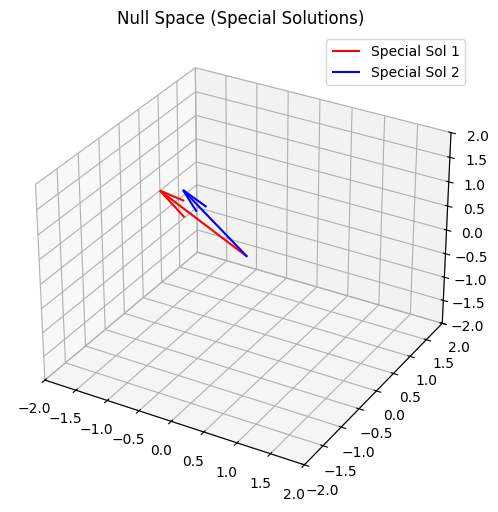

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

null_vecs = np.array(A.nullspace(), dtype=float)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot each special solution
colors = ['r','b','g']
for i, vec in enumerate(null_vecs):
    ax.quiver(0,0,0, vec[0], vec[1], vec[2], color=colors[i%3], label=f"Special Sol {i+1}")

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_title("Null Space (Special Solutions)")
ax.legend()
plt.show()


# 5) Use Cases
* Pivot Variables: Reveal independent variables → show system rank.
* Free Variables: Show redundancy → directions of freedom in solutions.
* Special Solutions: Provide a basis for the null space.

Applications:

* In linear regression, free variables indicate underdetermined problems.
* In engineering systems, null space corresponds to redundant motions or * constraints.
* n data compression, null space shows information loss directions.

Key Values They Produce:

* Rank = number of pivot variables.
* Nullity = number of free variables.
* Special solutions = explicit vectors spanning the null space.